In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
audiData = pd.read_csv("audi.csv")

In [3]:
audiData.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
audiData.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [5]:
audiData.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

C:\Users\ozerr\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

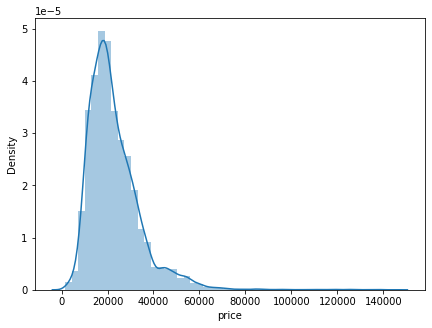

In [6]:
plt.figure(figsize = (7,5))
sbn.distplot(audiData["price"])

C:\Users\ozerr\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

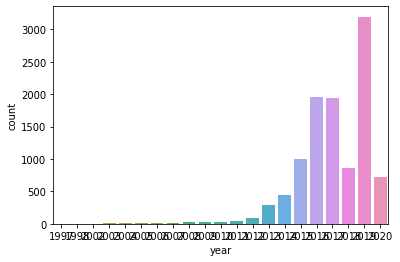

In [7]:
sbn.countplot(audiData["year"])

In [8]:
audiData.corr()

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.592581,-0.789667,0.093066,-0.351281,-0.031582
price,0.592581,1.000000,-0.535357,0.356157,-0.600334,0.591262
mileage,-0.789667,-0.535357,1.000000,-0.166547,0.395103,0.070710
tax,0.093066,0.356157,-0.166547,1.000000,-0.635909,0.393075
mpg,-0.351281,-0.600334,0.395103,-0.635909,1.000000,-0.365621
engineSize,-0.031582,0.591262,0.070710,0.393075,-0.365621,1.000000


In [9]:
audiData.corr()["price"].sort_values()

mpg          -0.600334
mileage      -0.535357
tax           0.356157
engineSize    0.591262
year          0.592581
price         1.000000
Name: price, dtype: float64

In [10]:
len(audiData) * 0.01

106.68

In [11]:
cleanData = audiData.sort_values("price", ascending = False).iloc[90:]

In [12]:
cleanData.describe()

,year,price,mileage,tax,mpg,engineSize
count,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000,10578.000000
mean,2017.082624,22389.867839,24989.358102,125.760541,50.951361,1.914606
std,2.166419,10182.607263,23532.885791,67.152934,12.846417,0.574098
min,1997.000000,1490.000000,5.000000,0.000000,18.900000,0.000000
25%,2016.000000,15000.000000,6000.000000,125.000000,40.900000,1.500000
50%,2017.000000,20000.000000,19268.000000,145.000000,49.600000,2.000000
75%,2019.000000,27888.000000,36702.250000,145.000000,58.900000,2.000000
max,2020.000000,61990.000000,323000.000000,580.000000,188.300000,6.300000


C:\Users\ozerr\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

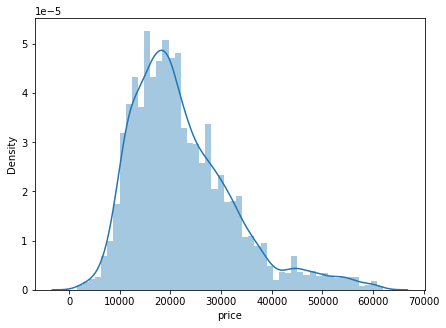

In [13]:
plt.figure(figsize = (7,5))
sbn.distplot(cleanData["price"])

In [14]:
audiData.groupby("year").mean()["price"]

year
1997     4650.000000
1998     4999.000000
2002     2433.000000
2003     3408.333333
2004     5053.600000
2005     3490.714286
2006     6499.111111
2007     7325.250000
2008     6281.428571
2009     6281.956522
2010     7224.093750
2011     8944.808511
2012     9860.811765
2013    11690.790378
2014    13890.659955
2015    15128.235235
2016    16908.725051
2017    19951.624289
2018    26296.707176
2019    30410.752268
2020    35967.067039
Name: price, dtype: float64

In [15]:
audiData = cleanData

In [16]:
audiData.groupby("year").mean()["price"]

year
1997     4650.000000
1998     4999.000000
2002     2433.000000
2003     3408.333333
2004     5053.600000
2005     3490.714286
2006     6499.111111
2007     7325.250000
2008     6281.428571
2009     6281.956522
2010     7224.093750
2011     8944.808511
2012     9860.811765
2013    11690.790378
2014    13890.659955
2015    15128.235235
2016    16847.266055
2017    19951.624289
2018    25631.415493
2019    29729.223172
2020    33445.359882
Name: price, dtype: float64

In [17]:
y = audiData["price"].values
x = audiData.drop(["price", "model", "transmission", "fuelType"], axis = 1).values

In [18]:
y

array([61990, 61950, 61900, ...,  1975,  1699,  1490], dtype=int64)

In [19]:
x

array([[2.0190e+03, 6.0000e+03, 1.4500e+02, 3.2800e+01, 3.0000e+00],
       [2.0200e+03, 8.5000e+03, 1.5000e+02, 3.3200e+01, 3.0000e+00],
       [2.0180e+03, 1.9227e+04, 1.4500e+02, 3.7200e+01, 4.0000e+00],
       ...,
       [2.0050e+03, 1.0400e+05, 2.4000e+02, 3.8100e+01, 2.0000e+00],
       [2.0040e+03, 1.1000e+05, 3.1500e+02, 3.6200e+01, 2.5000e+00],
       [2.0030e+03, 1.0100e+05, 2.4000e+02, 4.4500e+01, 1.9000e+00]])

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

In [22]:
len(x_train)

7404

In [23]:
len(x_test)

3174

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()

In [26]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
x_train.shape

(7404, 5)

In [29]:
model = Sequential()

model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))
model.add(Dense(12, activation = "relu"))

model.add(Dense(1))

model.compile(optimizer = "adam", loss = "mse")

In [30]:
model.fit(x = x_train, y = y_train, validation_data = (x_test, y_test), batch_size = 250, epochs = 300)

Epoch 1/300
30/30 [==============================] - 0s 4ms/step - loss: 601903424.0000 - val_loss: 612128768.0000
Epoch 2/300
30/30 [==============================] - 0s 931us/step - loss: 601882048.0000 - val_loss: 612094208.0000
Epoch 3/300
30/30 [==============================] - 0s 898us/step - loss: 601823168.0000 - val_loss: 611996032.0000
Epoch 4/300
30/30 [==============================] - 0s 898us/step - loss: 601658560.0000 - val_loss: 611727744.0000
Epoch 5/300
30/30 [==============================] - 0s 897us/step - loss: 601229824.0000 - val_loss: 611055424.0000
Epoch 6/300
30/30 [==============================] - 0s 931us/step - loss: 600193728.0000 - val_loss: 609494144.0000
Epoch 7/300
30/30 [==============================] - 0s 898us/step - loss: 597922560.0000 - val_loss: 606238784.0000
Epoch 8/300
30/30 [==============================] - 0s 898us/step - loss: 593466496.0000 - val_loss: 600106624.0000
Epoch 9/300
30/30 [==============================] - 0s 898us/step

30/30 [==============================] - 0s 948us/step - loss: 61956440.0000 - val_loss: 61459224.0000
Epoch 72/300
30/30 [==============================] - 0s 931us/step - loss: 61316680.0000 - val_loss: 60823860.0000
Epoch 73/300
30/30 [==============================] - 0s 898us/step - loss: 60671660.0000 - val_loss: 60174260.0000
Epoch 74/300
30/30 [==============================] - 0s 898us/step - loss: 60040500.0000 - val_loss: 59538300.0000
Epoch 75/300
30/30 [==============================] - 0s 931us/step - loss: 59391244.0000 - val_loss: 58897524.0000
Epoch 76/300
30/30 [==============================] - 0s 898us/step - loss: 58699620.0000 - val_loss: 58229800.0000
Epoch 77/300
30/30 [==============================] - 0s 864us/step - loss: 58049676.0000 - val_loss: 57563744.0000
Epoch 78/300
30/30 [==============================] - 0s 898us/step - loss: 57345956.0000 - val_loss: 56885196.0000
Epoch 79/300
30/30 [==============================] - 0s 931us/step - loss: 56640472.

30/30 [==============================] - 0s 898us/step - loss: 18357812.0000 - val_loss: 20413524.0000
Epoch 142/300
30/30 [==============================] - 0s 898us/step - loss: 18142740.0000 - val_loss: 20135502.0000
Epoch 143/300
30/30 [==============================] - 0s 898us/step - loss: 17932840.0000 - val_loss: 19963210.0000
Epoch 144/300
30/30 [==============================] - 0s 898us/step - loss: 17730774.0000 - val_loss: 19724366.0000
Epoch 145/300
30/30 [==============================] - 0s 864us/step - loss: 17524862.0000 - val_loss: 19526638.0000
Epoch 146/300
30/30 [==============================] - 0s 864us/step - loss: 17333948.0000 - val_loss: 19392502.0000
Epoch 147/300
30/30 [==============================] - 0s 864us/step - loss: 17156254.0000 - val_loss: 19166104.0000
Epoch 148/300
30/30 [==============================] - 0s 864us/step - loss: 16994722.0000 - val_loss: 19030116.0000
Epoch 149/300
30/30 [==============================] - 0s 864us/step - loss: 1

30/30 [==============================] - 0s 864us/step - loss: 13968205.0000 - val_loss: 16274809.0000
Epoch 212/300
30/30 [==============================] - 0s 865us/step - loss: 13944881.0000 - val_loss: 16045413.0000
Epoch 213/300
30/30 [==============================] - 0s 864us/step - loss: 13904682.0000 - val_loss: 15969549.0000
Epoch 214/300
30/30 [==============================] - 0s 898us/step - loss: 13872431.0000 - val_loss: 15977136.0000
Epoch 215/300
30/30 [==============================] - 0s 864us/step - loss: 13844955.0000 - val_loss: 16025352.0000
Epoch 216/300
30/30 [==============================] - 0s 864us/step - loss: 13853172.0000 - val_loss: 15951142.0000
Epoch 217/300
30/30 [==============================] - 0s 864us/step - loss: 13802316.0000 - val_loss: 16039790.0000
Epoch 218/300
30/30 [==============================] - 0s 897us/step - loss: 13789139.0000 - val_loss: 15906349.0000
Epoch 219/300
30/30 [==============================] - 0s 931us/step - loss: 1

30/30 [==============================] - 0s 864us/step - loss: 13192927.0000 - val_loss: 15339391.0000
Epoch 282/300
30/30 [==============================] - 0s 931us/step - loss: 13179766.0000 - val_loss: 15338297.0000
Epoch 283/300
30/30 [==============================] - 0s 948us/step - loss: 13188727.0000 - val_loss: 15401741.0000
Epoch 284/300
30/30 [==============================] - 0s 864us/step - loss: 13187696.0000 - val_loss: 15396909.0000
Epoch 285/300
30/30 [==============================] - 0s 864us/step - loss: 13212126.0000 - val_loss: 15649111.0000
Epoch 286/300
30/30 [==============================] - 0s 898us/step - loss: 13200537.0000 - val_loss: 15382713.0000
Epoch 287/300
30/30 [==============================] - 0s 898us/step - loss: 13144894.0000 - val_loss: 15309210.0000
Epoch 288/300
30/30 [==============================] - 0s 898us/step - loss: 13147043.0000 - val_loss: 15375967.0000
Epoch 289/300
30/30 [==============================] - 0s 898us/step - loss: 1

In [31]:
lossData = pd.DataFrame(model.history.history)

In [32]:
lossData.head()

,loss,val_loss
0,601903424.0,612128768.0
1,601882048.0,612094208.0
2,601823168.0,611996032.0
3,601658560.0,611727744.0
4,601229824.0,611055424.0


<AxesSubplot:>

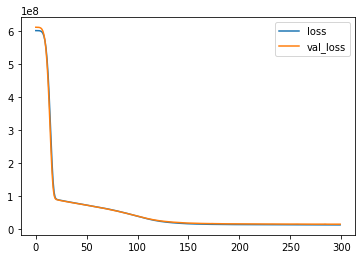

In [33]:
lossData.plot()

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
predictedArr = model.predict(x_test)

In [36]:
predictedArr

array([[11999.685],
       [17711.777],
       [13170.821],
       ...,
       [18515.344],
       [14431.075],
       [13210.003]], dtype=float32)

In [37]:
mean_absolute_error(y_test, predictedArr)

2608.9260397744615

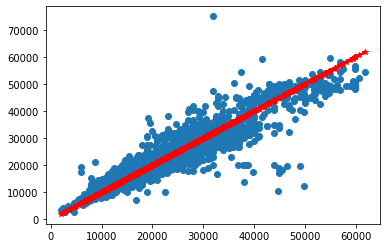

In [38]:
plt.scatter(y_test, predictedArr)
plt.plot(y_test, y_test,"r-*")

In [39]:
realDf = pd.DataFrame(y_test, columns = ["Real Y"])

In [40]:
realDf

,Real Y
0,11000
1,20995
2,11000
3,36950
4,23439
...,...
3169,31720
3170,10485
3171,20498
3172,14699


In [41]:
predictedArr = pd.Series(predictedArr.reshape(3174,))

In [42]:
predictedArr

0       11999.684570
1       17711.777344
2       13170.821289
3       28334.695312
4       25417.623047
            ...     
3169    26051.279297
3170    11097.031250
3171    18515.343750
3172    14431.075195
3173    13210.002930
Length: 3174, dtype: float32

In [43]:
predictedDf = pd.concat([realDf, predictedArr], axis = 1)

In [44]:
predictedDf.columns = ["Real Price", "Predicted Price"]

In [45]:
predictedDf

,Real Price,Predicted Price
0,11000,11999.684570
1,20995,17711.777344
2,11000,13170.821289
3,36950,28334.695312
4,23439,25417.623047
...,...,...
3169,31720,26051.279297
3170,10485,11097.031250
3171,20498,18515.343750
3172,14699,14431.075195


In [46]:
predictedDf.to_excel("predictedPrice.xlsx")